In [1336]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [1337]:
df= pd.read_csv("C:/Users/stefa/Documents/MASTER/tareas/sample_mmp.csv")

C:\Users\stefa\AppData\Local\Temp\ipykernel_31072\4242051981.py:1: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("C:/Users/stefa/Documents/MASTER/tareas/sample_mmp.csv")


In [1338]:
df.head(5)

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0,0,NaN,...,19951.0,0,NaN,0.0,0,0,0.0,0.0,11.0,1
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0,0,NaN,...,48753.0,0,0.0,0.0,0,0,0.0,1.0,3.0,0
2,2731904,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.0,0,NaN,...,33111.0,1,0.0,0.0,1,1,0.0,0.0,15.0,0
3,1359513,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.0,0,NaN,...,48473.0,1,NaN,0.0,0,0,0.0,0.0,15.0,1
4,236059,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.0,0,NaN,...,4343.0,1,NaN,0.0,1,0,0.0,1.0,13.0,1


In [1339]:
df.shape

(500000, 84)

In [1340]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,500000.0,4.458888e+06,2.575619e+06,2.0,2227692.50,4461367.5,6.690936e+06,8.921471e+06
IsBeta,500000.0,2.000000e-06,1.414214e-03,0.0,0.00,0.0,0.000000e+00,1.000000e+00
RtpStateBitfield,498168.0,6.846207e+00,1.023049e+00,0.0,7.00,7.0,7.000000e+00,3.500000e+01
IsSxsPassiveMode,500000.0,1.724200e-02,1.301720e-01,0.0,0.00,0.0,0.000000e+00,1.000000e+00
DefaultBrowsersIdentifier,24061.0,1.652825e+03,1.004754e+03,1.0,788.00,1632.0,2.381000e+03,3.209000e+03
AVProductStatesIdentifier,498062.0,4.785091e+04,1.402309e+04,3.0,49480.00,53447.0,5.344700e+04,7.049200e+04
AVProductsInstalled,498062.0,1.326763e+00,5.229999e-01,1.0,1.00,1.0,2.000000e+00,5.000000e+00
AVProductsEnabled,498062.0,1.020714e+00,1.666080e-01,0.0,1.00,1.0,1.000000e+00,4.000000e+00
HasTpm,500000.0,9.878160e-01,1.097068e-01,0.0,1.00,1.0,1.000000e+00,1.000000e+00
CountryIdentifier,500000.0,1.080375e+02,6.306854e+01,1.0,51.00,97.0,1.620000e+02,2.220000e+02


In [1341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

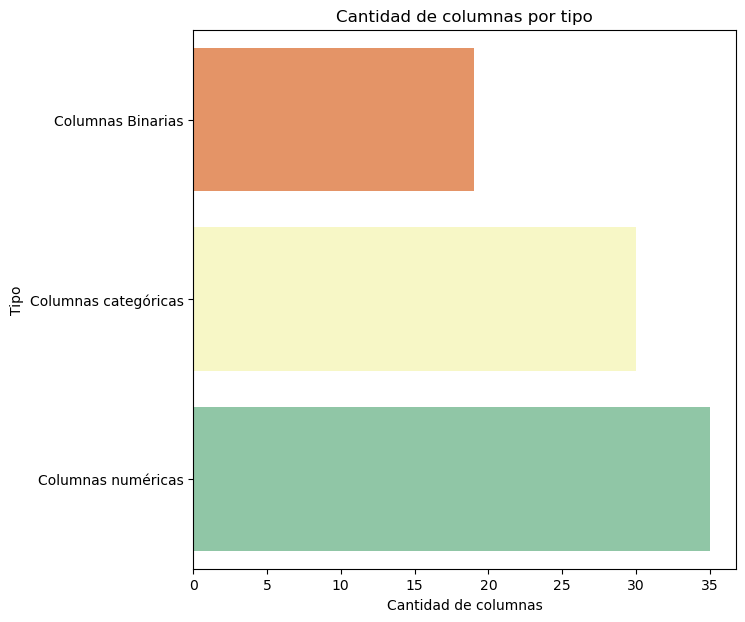

In [1342]:
# Obtener información sobre registros no nulos
missing_df = pd.DataFrame({'Columna': df.columns, 'Número de registros': df.count(), 'Total': len(df)}).sort_values("Número de registros", ascending=False)

# Obtener información sobre la cardinalidad
cardinality_df = pd.DataFrame({'Columna': df.columns, 'Cardinality': df.nunique()}).sort_values("Cardinality", ascending=False)
cardinality_df = cardinality_df[cardinality_df['Cardinality'] > 2]  # Filtrar columnas con más de 2 valores únicos

# Obtener información sobre el tipo de columnas
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
true_numerical_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col not in binary_columns]
categorical_columns = [col for col in df.columns if col not in true_numerical_columns and col not in binary_columns]

type_df = pd.DataFrame({'Type': ['Columnas Binarias', 'Columnas numéricas', 'Columnas categóricas'],
                        'Conteo de Columnas': [len(binary_columns), len(true_numerical_columns), len(categorical_columns)]}).sort_values('Conteo de Columnas', ascending=True)


f, ax = plt.subplots(figsize=(7, 7))


sns.barplot(x="Conteo de Columnas", y="Type", data=type_df, palette='Spectral', hue = 'Type', legend=False)

plt.title('Cantidad de columnas por tipo')
plt.xlabel('Cantidad de columnas')
plt.ylabel('Tipo')

plt.show()



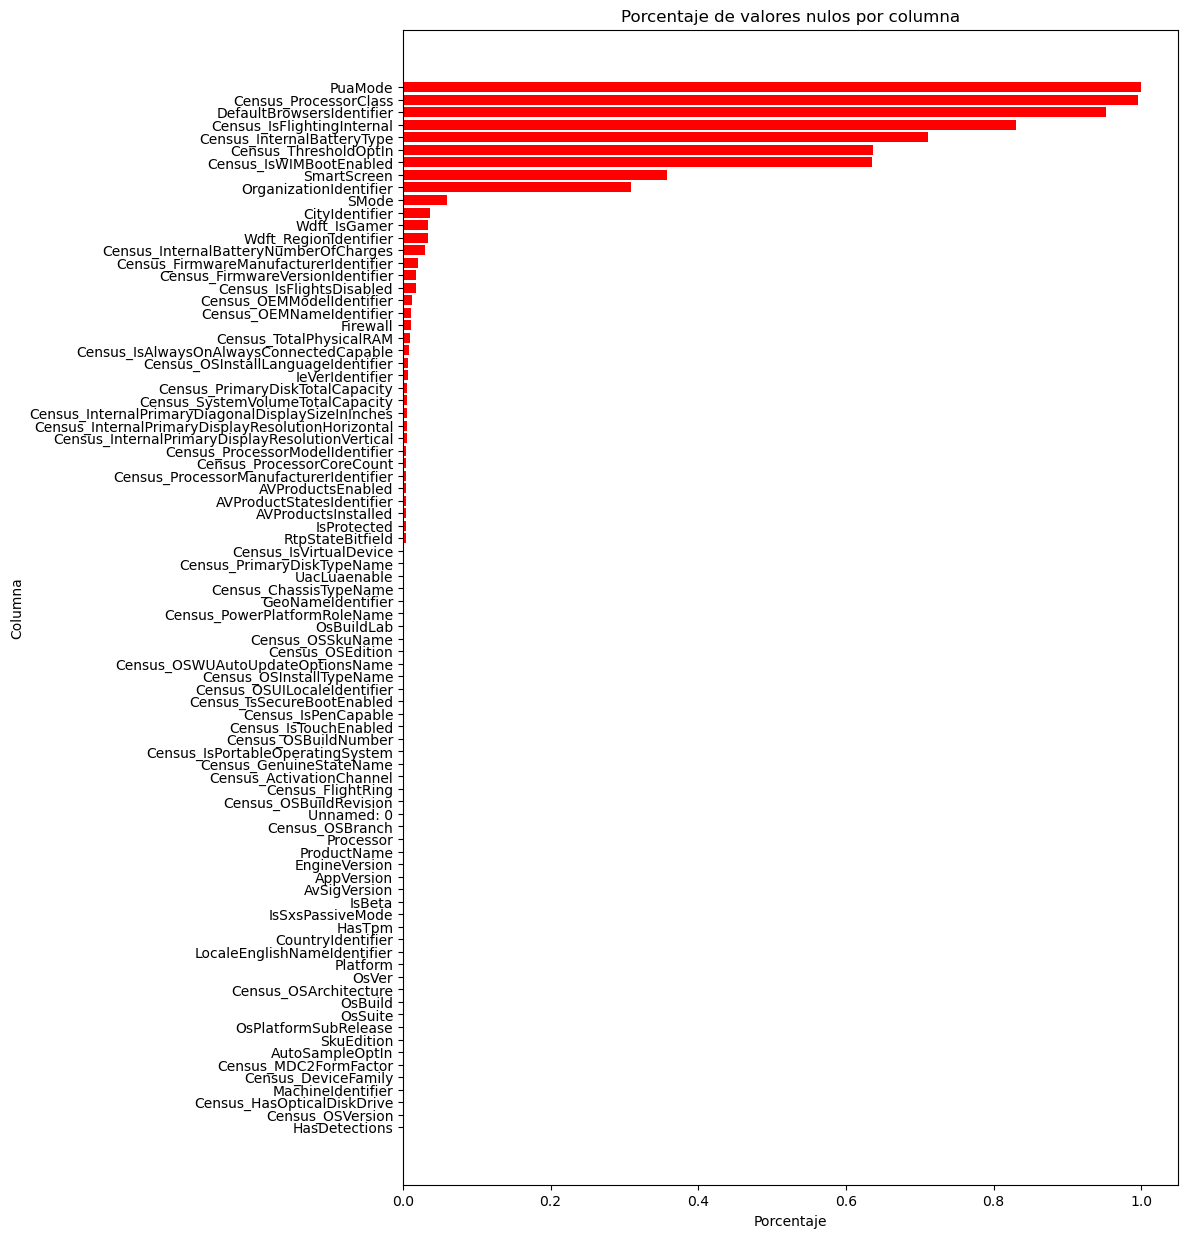

In [1343]:
# Obtener el porcentaje de valores nulos por columna
df_null_values = df.isnull().mean().sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(10,15))

# Crear el gráfico de barras horizontal
ax.barh(y=df_null_values.index,  # Posicionar las barras según los índices
        width=df_null_values,  
        color='red')  

# Invertir el eje Y para que las columnas aparezcan en orden correcto
ax.invert_yaxis()

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje')
plt.ylabel('Columna')


plt.show()


C:\Users\stefa\AppData\Local\Temp\ipykernel_31072\1086767184.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cardinalidad', y='column', data=df_cardinalidad,palette="coolwarm")


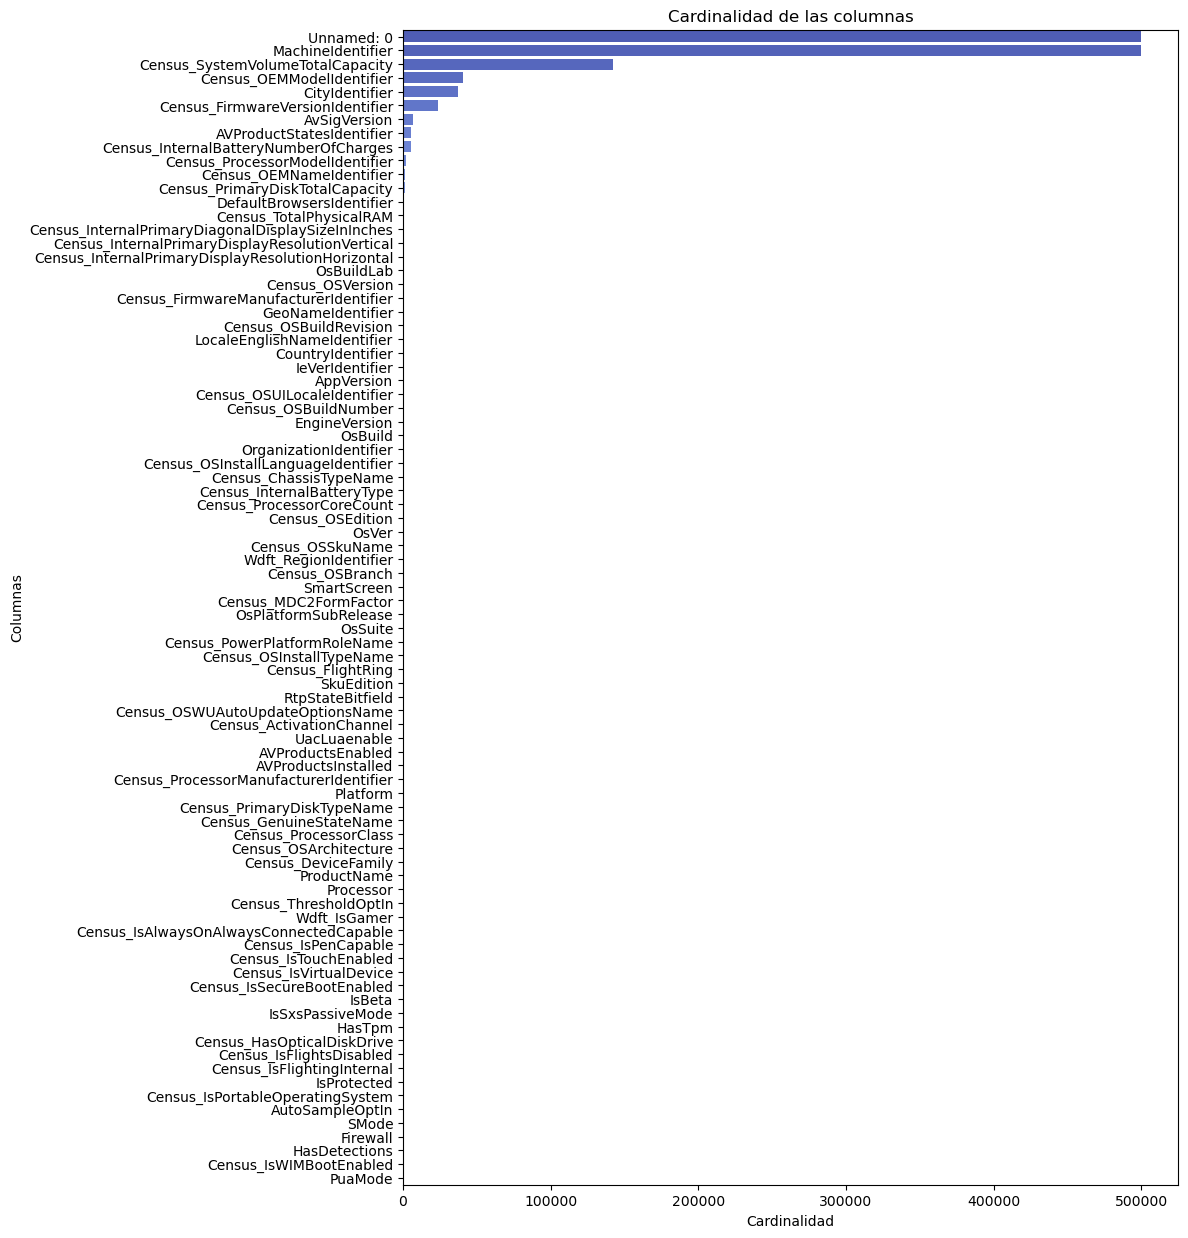

In [1344]:
# Calcular la cardinalidad de cada columna
cardinalidad = df.nunique()
df_cardinalidad = pd.DataFrame({'column': cardinalidad.index, 'cardinalidad': cardinalidad.values})
df_cardinalidad = df_cardinalidad.sort_values(by='cardinalidad', ascending=False)

fig, ax = plt.subplots(figsize=(10,15))
sns.barplot(x='cardinalidad', y='column', data=df_cardinalidad,palette="coolwarm")

plt.title('Cardinalidad de las columnas')
plt.xlabel('Cardinalidad')
plt.ylabel('Columnas')

plt.show()

In [1345]:
df2 = df.copy()

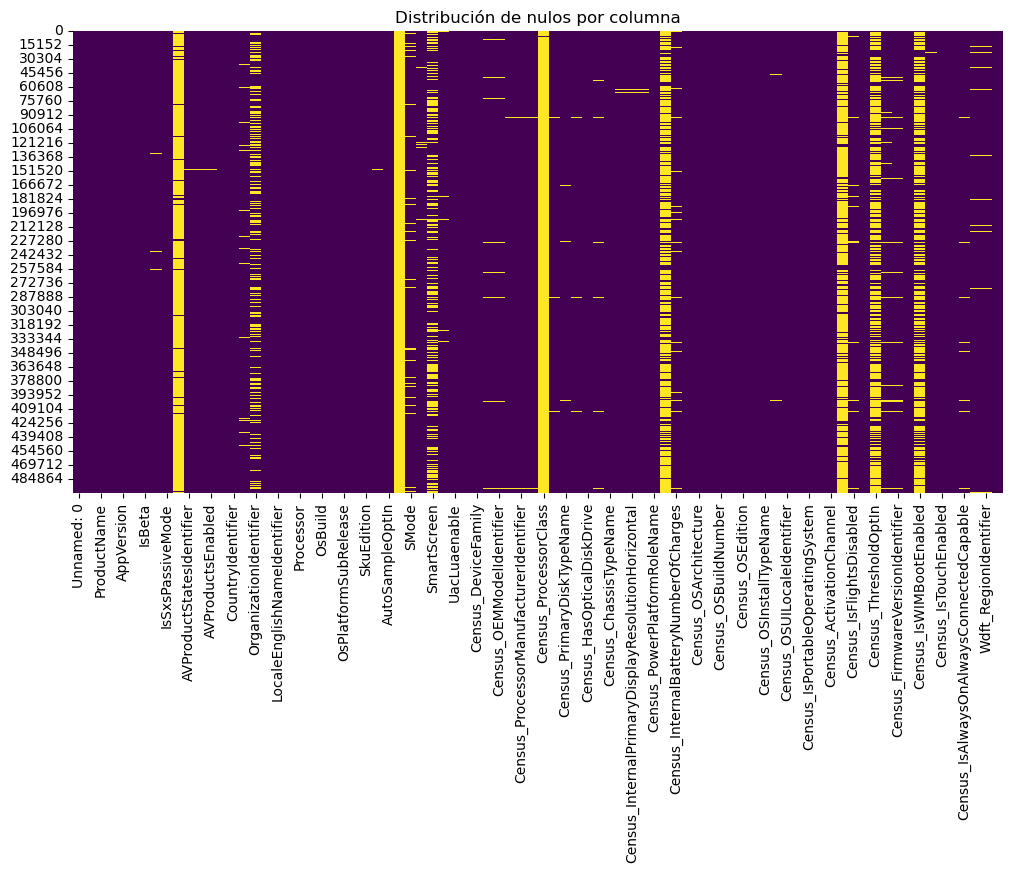

In [1346]:
# Distribución de nulos 
plt.figure(figsize=(12, 6))
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')
plt.title('Distribución de nulos por columna')
plt.show()

In [1465]:
#Memoria RAM por procesador
df2['RAM_x_procesador'] = df2['Census_TotalPhysicalRAM']/ df2['Census_ProcessorCoreCount']
df2['RAM_x_procesador'] = df2['RAM_x_procesador'].fillna(-1)

In [1461]:
# Capacidad total del disco primario
df2['capacidad_total_disco_primario'] = df2['Census_PrimaryDiskTotalCapacity']

# Capacidad de la unidad C:
df2['unidad_c_capacidad'] = df2['Census_SystemVolumeTotalCapacity']

# Proporción de uso de la unidad C:
df2['proporcion_uso_unidad_c'] = df2['unidad_c_capacidad'] / df2['capacidad_total_disco_primario']

#relleno a -1 los nulos
df2['proporcion_uso_unidad_c'].fillna(-1, inplace=True)

In [1469]:
# Capacidad total del disco primario en bytes
df2['capacidad_total_disco_primario'] = df2['Census_PrimaryDiskTotalCapacity']

# Capacidad de la unidad C: en bytes
df2['capacidad_unidad_c'] = df2['Census_SystemVolumeTotalCapacity']

# Espacio no utilizado en el disco primario en bytes
df2['espacio_no_utilizado_disco_primario'] = df2['capacidad_total_disco_primario'] - df2['capacidad_unidad_c']


In [1348]:
# Código de imputación de valores nulos
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

numeric_imputer = SimpleImputer(strategy='median')
df[numeric_features] = numeric_imputer.fit_transform(df[numeric_features])

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])


In [1349]:
# Obtiene las columnas del DataFrame original
columnas_originales = set(df.columns)

# Obtiene las columnas del DataFrame después de eliminar las columnas con más del 90% de valores nulos
columnas_finales = set(df2.columns)
df2 = df.dropna(axis=1,thresh=df.shape[0]*0.9) # elimina columnas con un mínimo del 90% de info. se quedan en 75column

# Obtiene la diferencia entre las dos conjuntos de columnas
columnas_eliminadas = columnas_originales - columnas_finales

print('Las siguientes columnas fueron eliminadas:', *columnas_eliminadas, sep='\n')


Las siguientes columnas fueron eliminadas:


In [1350]:
# Obtiene las columnas con más del 90% de valores nulos
columnas_con_nulos = np.where(np.mean(df2.isnull(), axis=0) > 0.9)[0]

# Si no hay columnas con más del 90% de valores nulos
if not columnas_con_nulos.size:
    print('No hay columnas con más del 90% de valores nulos')
else:
    print('Las siguientes columnas tienen más del 90% de valores nulos:')
    print(*df2.columns[columnas_con_nulos], sep='\n')


No hay columnas con más del 90% de valores nulos


In [1351]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  float64
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  float64
 7   RtpStateBitfield                                   500000 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  float6

In [1352]:
df2 = df2.drop(["Unnamed: 0"], axis = 1)
#elimino Unnamed: 0

In [1353]:
df2.set_index("MachineIdentifier", inplace = True)
#defino "MachineIdentifier" como index

In [1354]:
df2.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 82 entries, ProductName to HasDetections
dtypes: float64(53), object(29)
memory usage: 316.6+ MB


In [1355]:
TARGET = 'HasDetections'
df2[TARGET].mean()

0.499906

In [1356]:
df2[TARGET].value_counts(normalize= True)*100

0.0    50.0094
1.0    49.9906
Name: HasDetections, dtype: float64

In [1357]:

tipos = df2.dtypes
#  diccionario para contar las columnas por tipo
columnas_por_tipo = {}
for col, tipo in tipos.items():
    if tipo not in columnas_por_tipo:
        columnas_por_tipo[tipo] = 0
    columnas_por_tipo[tipo] += 1


for tipo, num_columnas in columnas_por_tipo.items():
    print(f"{tipo}: {num_columnas}")


object: 29
float64: 53


In [1358]:
lista_eliminar = ["AutoSampleOptIn", "OsBuildLab", "CityIdentifier","GeoNameIdentifier" ,"Census_InternalBatteryNumberOfCharges", "IsBeta", "Census_InternalPrimaryDisplayResolutionHorizontal", "Census_InternalPrimaryDisplayResolutionVertical","UacLuaenable", "Census_InternalPrimaryDiagonalDisplaySizeInInches" ]
#columnas a eliminar por no aportar información relevante al DF o que ya la tengo en otras columnas o que tiene un porcentaje de nulos muy alto

In [1359]:
df3 = df2.drop(lista_eliminar, axis = 1)

In [1360]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 72 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   ProductName                              500000 non-null  object 
 1   EngineVersion                            500000 non-null  object 
 2   AppVersion                               500000 non-null  object 
 3   AvSigVersion                             500000 non-null  object 
 4   RtpStateBitfield                         500000 non-null  float64
 5   IsSxsPassiveMode                         500000 non-null  float64
 6   DefaultBrowsersIdentifier                500000 non-null  float64
 7   AVProductStatesIdentifier                500000 non-null  float64
 8   AVProductsInstalled                      500000 non-null  float64
 9   AVProductsEnabled                        500000 non

In [1361]:
# Detectar filas duplicadas
duplicados = df3.duplicated()

# Mostrar las filas duplicadas
df3[duplicados]


,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,
9474b685419b9f2724d18534ab5cbd85,win8defender,1.1.13504.0,4.11.15063.0,1.237.0.0,7.0,0.0,3195.0,53447.0,1.0,1.0,...,9599.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0
7012fe5425da96f1655f309d6d12e28d,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1494.0,7.0,0.0,1632.0,53447.0,1.0,1.0,...,44624.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0
fe4ef602d39144f3044b8850e61b356d,win8defender,1.1.14104.0,4.12.16299.15,1.251.42.0,7.0,0.0,2064.0,53447.0,1.0,1.0,...,33070.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
a3fb6f71110964f3265bc769016cd714,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0,0.0,1632.0,53447.0,1.0,1.0,...,33154.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
147718c19ad58925ee5d195fb82d74a7,win8defender,1.1.15200.1,4.12.16299.15,1.275.767.0,7.0,0.0,1632.0,15911.0,2.0,1.0,...,46890.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
0357f4f6b11d99decc9cd38039075eec,win8defender,1.1.15100.1,4.18.1807.18075,1.273.933.0,7.0,0.0,1632.0,53447.0,1.0,1.0,...,2570.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
6be35bb8239175d234ab313f6d581368,win8defender,1.1.15200.1,4.18.1807.18075,1.275.11.0,7.0,0.0,1632.0,53447.0,1.0,1.0,...,57723.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
c3c70a8ff8a46e4cfb42ab25040a6137,win8defender,1.1.13504.0,4.11.15063.1155,1.237.0.0,7.0,0.0,1632.0,53447.0,1.0,1.0,...,63175.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,1.0
60839962b50d18962610f2be756f7d2f,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0,0.0,1632.0,53447.0,1.0,1.0,...,33054.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0


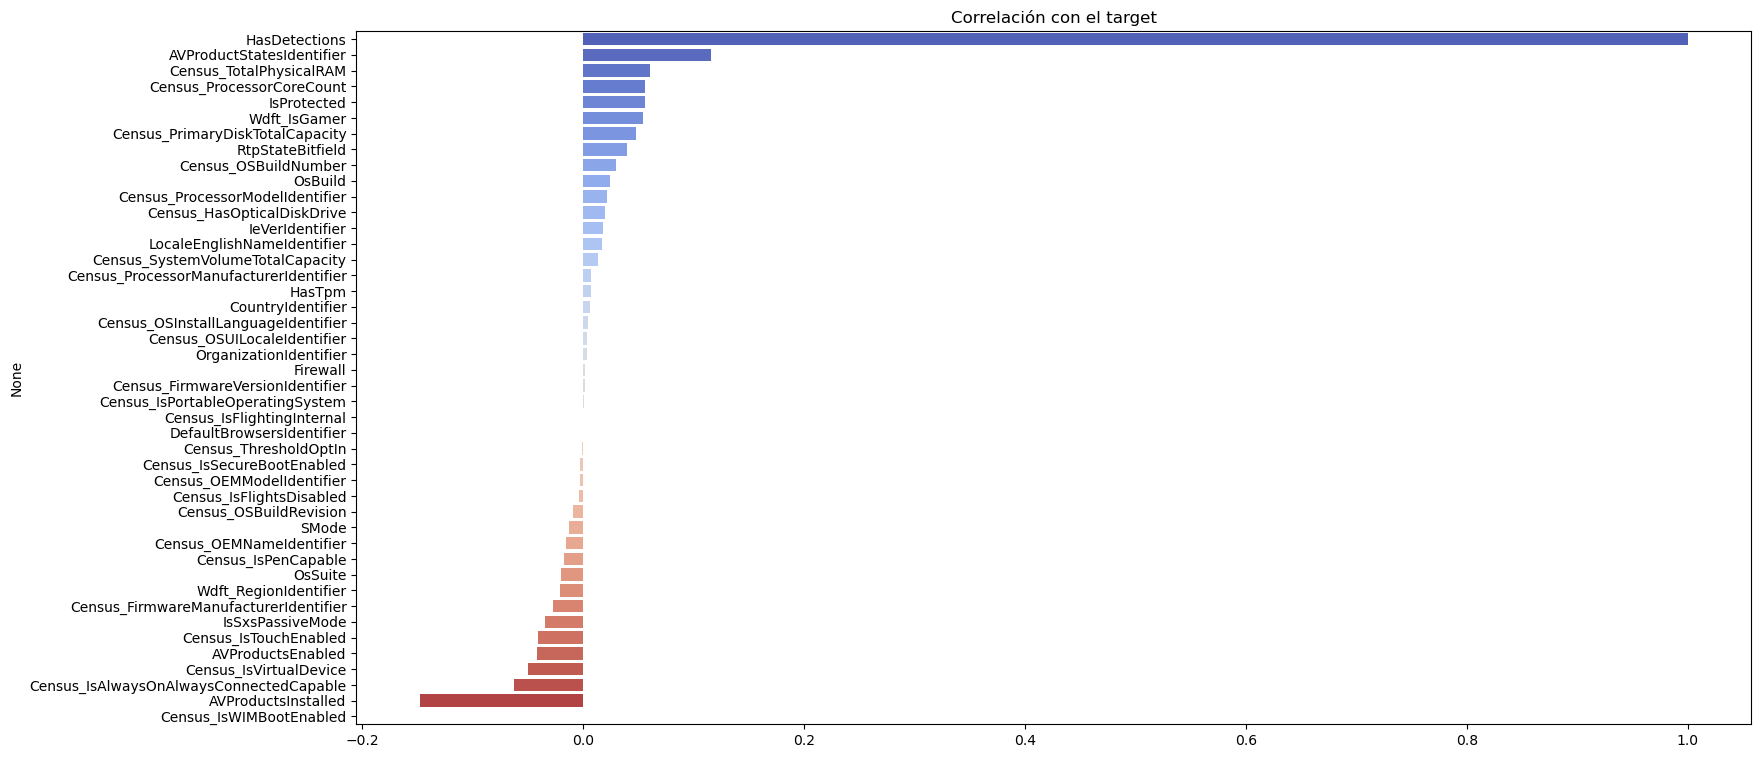

In [1362]:
# Calcular la matriz de correlación con respecto a la variable objetivo
correlacion_numericas = df3.select_dtypes(include=['number']).corr()['HasDetections'].sort_values(ascending=False)

# Crear un gráfico de barras para visualizar la correlación
plt.figure(figsize=(18, 9))
sns.barplot(x=correlacion_numericas.values, y=correlacion_numericas.index, hue=correlacion_numericas.index, palette='coolwarm', legend=False)

plt.title('Correlación con el target')

plt.show()


In [1363]:
def get_var_list(df):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in df:
        if    (df[i].dtype.kind=="f" or df[i].dtype.kind=="i") and len(df[i].unique())!= 2  and i not in TARGET:
              lista_numericas.append(i)
        elif  (df[i].dtype.kind=="f" or df[i].dtype.kind=="i")  and len(df[i].unique())== 2  and i not in TARGET:
              lista_boolean.append(i)
        elif  (df[i].dtype.kind=="O")  and i not in TARGET:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [1364]:
lista_numericas, lista_boolean, lista_categoricas= get_var_list(df3)


In [1365]:
lista_boolean

['IsSxsPassiveMode',
 'HasTpm',
 'IsProtected',
 'SMode',
 'Firewall',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_ThresholdOptIn',
 'Census_IsSecureBootEnabled',
 'Census_IsVirtualDevice',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer']

In [1366]:
lista_categoricas

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'SkuEdition',
 'PuaMode',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [1367]:
lista_numericas

['RtpStateBitfield',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'OrganizationIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IeVerIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_IsWIMBootEnabled',
 'Wdft_RegionIdentifier']

In [1368]:
def setOthers(dataframe, column, num_values):
    top_categories = dataframe[column].value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append('Otros')
    dataframe[column] = pd.Categorical(dataframe[column], categories=top_categories_list)
    return dataframe[column].fillna('Otros')

In [1369]:
df3['Census_PrimaryDiskTypeName'].nunique()

4

In [1370]:
df3['Census_PrimaryDiskTypeName'].value_counts(dropna = False)

HDD            326138
SSD            138155
UNKNOWN         20083
Unspecified     15624
Name: Census_PrimaryDiskTypeName, dtype: int64

In [1371]:
df3['Census_PrimaryDiskTypeName'] = setOthers(df3, 'Census_PrimaryDiskTypeName', 2)

In [1372]:
df3["Census_PrimaryDiskTypeName"].describe()
#convertirlo a -1

count     500000
unique         3
top          HDD
freq      326138
Name: Census_PrimaryDiskTypeName, dtype: object

In [1373]:
df3['Census_PrimaryDiskTypeName'].value_counts(dropna = False)

HDD      326138
SSD      138155
Otros     35707
Name: Census_PrimaryDiskTypeName, dtype: int64

In [1374]:
df3['Census_ChassisTypeName'].value_counts(dropna = False)

Notebook               294269
Desktop                104979
Laptop                  38261
Portable                20181
AllinOne                11407
MiniTower                4849
Convertible              4685
Other                    4215
UNKNOWN                  3695
Detachable               2930
LowProfileDesktop        2878
HandHeld                 2652
SpaceSaving              1689
Tablet                    730
Tower                     692
Unknown                   575
MainServerChassis         512
MiniPC                    261
LunchBox                  224
RackMountChassis          189
SubNotebook                47
BusExpansionChassis        38
30                         11
StickPC                     7
0                           5
MultisystemChassis          3
35                          3
PizzaBox                    3
Blade                       3
31                          2
SubChassis                  2
32                          1
ExpansionChassis            1
25        

In [1375]:
df3['Census_ChassisTypeName'] = setOthers(df3, 'Census_ChassisTypeName', 4)
df3['Census_PowerPlatformRoleName'] = setOthers(df3, 'Census_PowerPlatformRoleName', 2)

In [1376]:
df3["Census_ChassisTypeName"].value_counts(dropna = False, normalize= True)*100


Notebook    58.8538
Desktop     20.9958
Otros        8.4620
Laptop       7.6522
Portable     4.0362
Name: Census_ChassisTypeName, dtype: float64

In [1377]:
df3["Census_PowerPlatformRoleName"].value_counts(dropna = False, normalize= True)*100


Mobile     69.2760
Desktop    23.2108
Otros       7.5132
Name: Census_PowerPlatformRoleName, dtype: float64

In [1378]:
# Punto de control
df4 = df3.copy()

In [1379]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 72 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              500000 non-null  object  
 1   EngineVersion                            500000 non-null  object  
 2   AppVersion                               500000 non-null  object  
 3   AvSigVersion                             500000 non-null  object  
 4   RtpStateBitfield                         500000 non-null  float64 
 5   IsSxsPassiveMode                         500000 non-null  float64 
 6   DefaultBrowsersIdentifier                500000 non-null  float64 
 7   AVProductStatesIdentifier                500000 non-null  float64 
 8   AVProductsInstalled                      500000 non-null  float64 
 9   AVProductsEnabled                       

In [1380]:
def replace_nan_moda(df, lista_nan_moda):
    # Función para calcular la moda y reemplazar valores nulos
    def g(column):
        mode = column.mode()[0]
        return column.fillna(mode)

    # Aplico la función a cada columna en la lista
    df[lista_nan_moda] = df[lista_nan_moda].apply(g)
    
    return df  


In [1381]:
# Uso de la función
lista_nan_moda = ["IsProtected", "Census_IsVirtualDevice", "Census_IsAlwaysOnAlwaysConnectedCapable"]
df4 = replace_nan_moda(df4.copy(), lista_nan_moda)

In [1382]:
df5 = df4.copy()

### Limpieza

In [1383]:
def setnumber(dataframe, column, num_values):
    top_categories = dataframe[column].value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append('-1.0')
    dataframe[column] = pd.to_numeric(dataframe[column], categories=top_categories_list)
    return dataframe[column].fillna('-1.0')
    #agrupa y cambia NAN a -1

In [1384]:
def setfillna(dataframe, column):
    return dataframe[column].fillna('-1.0')
    #cambia NAN -1

In [1385]:
lista_1 = ["AVProductsInstalled","AVProductsEnabled", "SMode", "Firewall","Census_FirmwareVersionIdentifier", "Census_SystemVolumeTotalCapacity", "Census_OSInstallLanguageIdentifier", "Census_IsFlightsDisabled", "Wdft_IsGamer"]
#lista a la que el NAN la convierto a -1
# añadir estas columnas a -1 ["AVProductStatesIdentifier", "IeVerIdentifier", "UacLuaenable","Census_ProcessorManufacturerIdentifier", "Census_OEMNameIdentifier","Census_OEMModelIdentifier", "Census_ProcessorCoreCount","Census_PrimaryDiskTotalCapacity", "Census_TotalPhysicalRAM"  ]

In [1386]:
df5[lista_1] = df5[lista_1].applymap(lambda x: -1 if pd.isna(x) else x)

In [1387]:
df5.select_dtypes(include=['number']).isnull().sum()

RtpStateBitfield                           0
IsSxsPassiveMode                           0
DefaultBrowsersIdentifier                  0
AVProductStatesIdentifier                  0
AVProductsInstalled                        0
AVProductsEnabled                          0
HasTpm                                     0
CountryIdentifier                          0
OrganizationIdentifier                     0
LocaleEnglishNameIdentifier                0
OsBuild                                    0
OsSuite                                    0
IsProtected                                0
SMode                                      0
IeVerIdentifier                            0
Firewall                                   0
Census_OEMNameIdentifier                   0
Census_OEMModelIdentifier                  0
Census_ProcessorCoreCount                  0
Census_ProcessorManufacturerIdentifier     0
Census_ProcessorModelIdentifier            0
Census_PrimaryDiskTotalCapacity            0
Census_Sys

In [1388]:
def setnumber(dataframe, column, num_values):
    numeric_column = pd.to_numeric(dataframe[column], errors='coerce')
    top_categories = numeric_column.value_counts().head(num_values)
    top_categories_list = top_categories.index.to_list()
    top_categories_list.append(-1)
    dataframe[column] = pd.Categorical(numeric_column, categories=top_categories_list, ordered=False)
    dataframe[column] = dataframe[column].astype(float).fillna(-1)
    return dataframe[column]

In [1389]:
df5["RtpStateBitfield"] = setnumber(df5, 'RtpStateBitfield', 1)
#1º valor tiene 97%, uno el resto de valore en -1
df5['AVProductStatesIdentifier'] = setnumber(df5, 'AVProductStatesIdentifier', 5)
#me quedo con los 5 primeros valores 1º 65% , 2º baja al 5º... 5º 1º
df5['IeVerIdentifier'] = setnumber(df5, 'IeVerIdentifier', 4)
#me quedo con los 4 primeros valores 1º 44%, 2º 20%, 3º y 4º 5%
df5['Census_ProcessorCoreCount'] = setnumber(df5, 'Census_ProcessorCoreCount', 3)
#me quedo con los 4 primeros valores 1º 60%, 2º 25% y  3º 9%
df5['Census_ProcessorManufacturerIdentifier'] = setnumber(df5, 'Census_ProcessorManufacturerIdentifier', 2)
#me quedo con los 2 primeros valores 1º 88% y 2º 11%
df5['Census_TotalPhysicalRAM'] = setnumber(df5, 'Census_TotalPhysicalRAM', 5)
#selecciono los 5 primeros valores 1º 46%, 2º 25%, 3º 12%, 4º 6%, 5º 4,5%

In [1390]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 72 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              500000 non-null  object  
 1   EngineVersion                            500000 non-null  object  
 2   AppVersion                               500000 non-null  object  
 3   AvSigVersion                             500000 non-null  object  
 4   RtpStateBitfield                         500000 non-null  float64 
 5   IsSxsPassiveMode                         500000 non-null  float64 
 6   DefaultBrowsersIdentifier                500000 non-null  float64 
 7   AVProductStatesIdentifier                500000 non-null  float64 
 8   AVProductsInstalled                      500000 non-null  float64 
 9   AVProductsEnabled                       

In [1391]:
df5.select_dtypes(include=['number']).isnull().sum()

RtpStateBitfield                           0
IsSxsPassiveMode                           0
DefaultBrowsersIdentifier                  0
AVProductStatesIdentifier                  0
AVProductsInstalled                        0
AVProductsEnabled                          0
HasTpm                                     0
CountryIdentifier                          0
OrganizationIdentifier                     0
LocaleEnglishNameIdentifier                0
OsBuild                                    0
OsSuite                                    0
IsProtected                                0
SMode                                      0
IeVerIdentifier                            0
Firewall                                   0
Census_OEMNameIdentifier                   0
Census_OEMModelIdentifier                  0
Census_ProcessorCoreCount                  0
Census_ProcessorManufacturerIdentifier     0
Census_ProcessorModelIdentifier            0
Census_PrimaryDiskTotalCapacity            0
Census_Sys

In [1392]:
def setfillnamax(dataframe, column):
    return dataframe[column].fillna(df4["Census_IsVirtualDevice"].max(), inplace = True)
# Cambia NAN a la mayoria

In [1393]:
lista_1 = ["AVProductsInstalled","AVProductsEnabled", "SMode", "Firewall","Census_FirmwareVersionIdentifier", "Census_SystemVolumeTotalCapacity", "Census_OSInstallLanguageIdentifier", "Census_IsFlightsDisabled", "Wdft_IsGamer"]
# lista a la que el NAN la convierto a -1

In [1394]:
#Compruebo las columnas que únicamente tienen 1 valor 
num_valores_unicos = df5.nunique()
columnas_con_un_atributo = num_valores_unicos[num_valores_unicos == 1].index
columnas_con_un_atributo



Index(['PuaMode', 'Census_IsWIMBootEnabled'], dtype='object')

In [1395]:
df6 = df5.copy()

In [1396]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 72 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              500000 non-null  object  
 1   EngineVersion                            500000 non-null  object  
 2   AppVersion                               500000 non-null  object  
 3   AvSigVersion                             500000 non-null  object  
 4   RtpStateBitfield                         500000 non-null  float64 
 5   IsSxsPassiveMode                         500000 non-null  float64 
 6   DefaultBrowsersIdentifier                500000 non-null  float64 
 7   AVProductStatesIdentifier                500000 non-null  float64 
 8   AVProductsInstalled                      500000 non-null  float64 
 9   AVProductsEnabled                       

In [1397]:
df6["Census_OEMNameIdentifier"].value_counts(dropna = False, normalize= True)*100
# agrupo por valores de 1000. 0-999 / 1000 - 1999 / >2000

2668.0    14.4022
2102.0    12.6610
1443.0    10.6420
2206.0    10.3776
585.0     10.0608
           ...   
3997.0     0.0002
3546.0     0.0002
4037.0     0.0002
2429.0     0.0002
1900.0     0.0002
Name: Census_OEMNameIdentifier, Length: 1589, dtype: float64

In [1398]:
agruparOEmodel = lambda dataframe, column, num_bins: pd.cut(dataframe[column], bins=[0, 1000, 2000, 3000, 4000, 5000, float('inf')], labels=[1000, 2000, 3000, 4000, 5000, 6000], include_lowest=True)[column]

In [1399]:
df6["Census_OEMModelIdentifier"].value_counts(dropna = False, normalize= True)*100
# agrupo por valores de 100000.

313586.0    3.4184
242491.0    2.9452
317701.0    1.5352
317708.0    1.3082
247520.0    1.2742
             ...  
1917.0      0.0002
318232.0    0.0002
342796.0    0.0002
8067.0      0.0002
35038.0     0.0002
Name: Census_OEMModelIdentifier, Length: 40697, dtype: float64

In [1400]:
df6["Census_ProcessorModelIdentifier"].value_counts(dropna = False, normalize= True)*100
# agrupo por valores de 1000. 0-999 / 1000 - 1999 / >2000

2697.0    3.2360
1998.0    2.9748
2660.0    2.1472
2373.0    1.9770
1992.0    1.9004
           ...  
4091.0    0.0002
1328.0    0.0002
1852.0    0.0002
3130.0    0.0002
4027.0    0.0002
Name: Census_ProcessorModelIdentifier, Length: 2243, dtype: float64

In [1401]:
df6["Wdft_RegionIdentifier"].value_counts(dropna = False, normalize= True)*100
#agrupoar >10 y < 10

10.0    23.4684
11.0    15.1224
3.0     14.6138
1.0     13.7384
15.0    11.4692
7.0      6.6724
8.0      3.1522
13.0     2.5362
5.0      2.2932
12.0     1.8230
6.0      1.7500
4.0      1.5172
9.0      0.9042
2.0      0.8940
14.0     0.0454
Name: Wdft_RegionIdentifier, dtype: float64

In [1402]:
df6["Census_FirmwareManufacturerIdentifier"].value_counts(dropna = False, normalize= True)*100
#7 grupos

142.0    30.2748
628.0    13.7562
554.0    13.1346
355.0    10.5516
556.0     8.9838
          ...   
33.0      0.0002
697.0     0.0002
13.0      0.0002
334.0     0.0002
585.0     0.0002
Name: Census_FirmwareManufacturerIdentifier, Length: 303, dtype: float64

In [1403]:
def agrupardiez(dataframe, column, num_bins):
    custom_bins = [0, 10, 15, 20, 21, float('inf')]
    labels = [10, 15, 20, 21, '+21']
    binned_values = pd.Series(dataframe[column]).map(dict(zip(custom_bins, labels)))
    dataframe[column] = binned_values
    return dataframe[column]

In [1404]:
df6["Census_TotalPhysicalRAM"].value_counts(dropna = False, normalize= True)*100
#7 grupos

 4096.0     46.6468
 8192.0     24.6348
 2048.0     12.3388
 16384.0     6.0358
-1.0         5.8740
 6144.0      4.4698
Name: Census_TotalPhysicalRAM, dtype: float64

In [1405]:
def agruparmil(dataframe, column, num_bins):
    bins = [0, 2001, 4001, 6001, 8001, 12001, 16001, float('inf')]
    labels = [2000, 4000, 6000, 8000, 12000, 16000, 16001]
    new_column = pd.cut(dataframe[column], bins=bins, labels=labels, include_lowest=True)
    dataframe[column] = new_column
    return dataframe[column]

In [1406]:
df6["Census_TotalPhysicalRAM"] = agruparmil(df4, "Census_TotalPhysicalRAM", 6)

In [1407]:
df6["Census_TotalPhysicalRAM"].value_counts(dropna = False, normalize= True)*100

6000     46.8066
12000    24.8156
4000     14.2086
16001     7.0156
8000      4.5112
16000     1.8408
2000      0.8016
Name: Census_TotalPhysicalRAM, dtype: float64

In [1408]:
df6["Census_PrimaryDiskTotalCapacity"].value_counts(dropna = False, normalize= True)*100
#5 grupos

476940.0    32.3318
953869.0    24.4366
305245.0     5.3374
122104.0     5.2888
244198.0     5.0318
             ...   
948333.0     0.0002
20646.0      0.0002
122069.0     0.0002
190652.0     0.0002
152499.0     0.0002
Name: Census_PrimaryDiskTotalCapacity, Length: 1103, dtype: float64

In [1409]:
def agruparcientosmiles(dataframe, column, num_bins):
    bins = [0, 100001, 200001, 500001, 1000001, float('inf')]
    labels = [100000, 200000, 500000, 1000000, 1000001]
    binned_values = pd.cut(dataframe[column], bins=bins, labels=labels, include_lowest=True)
    dataframe['cat_' + column] = binned_values
    return dataframe['cat_' + column]

In [1410]:
df6['Census_PrimaryDiskTotalCapacity'] = agruparcientosmiles(df4, 'Census_PrimaryDiskTotalCapacity', 5)

In [1411]:
df6["Census_PrimaryDiskTotalCapacity"].value_counts(dropna = False, normalize= True)*100

500000     50.8708
1000000    28.6418
200000     10.8950
100000      8.2126
1000001     1.3798
Name: Census_PrimaryDiskTotalCapacity, dtype: float64

In [1412]:
df6["Census_ProcessorCoreCount"].value_counts(dropna = False, normalize= True)*100
#5 grupos

 4.0    61.2898
 2.0    25.8356
 8.0     9.7990
-1.0     3.0756
Name: Census_ProcessorCoreCount, dtype: float64

In [1413]:
df6['Census_ProcessorCoreCount'] = setnumber(df4, 'Census_ProcessorCoreCount', 4)

In [1414]:
df6["Census_ProcessorCoreCount"].value_counts(dropna = False, normalize= True)*100

 4.0     61.2898
 2.0     25.8356
 8.0      9.7990
-1.0      2.0388
 12.0     1.0368
Name: Census_ProcessorCoreCount, dtype: float64

In [1415]:
df6["Census_OEMModelIdentifier"].value_counts(dropna = False, normalize= True)*100
#5grupos

313586.0    3.4184
242491.0    2.9452
317701.0    1.5352
317708.0    1.3082
247520.0    1.2742
             ...  
1917.0      0.0002
318232.0    0.0002
342796.0    0.0002
8067.0      0.0002
35038.0     0.0002
Name: Census_OEMModelIdentifier, Length: 40697, dtype: float64

In [1416]:
df6['Census_OEMModelIdentifier'] = agruparcientosmiles(df4, 'Census_OEMModelIdentifier', 3)

In [1417]:
df6["Census_OEMModelIdentifier"].value_counts(dropna = False, normalize= True)*100

500000     71.9734
200000     22.6860
100000      5.3406
1000000     0.0000
1000001     0.0000
Name: Census_OEMModelIdentifier, dtype: float64

In [1418]:
df6["IeVerIdentifier"].value_counts(dropna = False, normalize= True)*100
#5 grupos

 137.0    43.8284
-1.0      25.9390
 117.0    19.7334
 108.0     5.2706
 111.0     5.2286
Name: IeVerIdentifier, dtype: float64

In [1419]:
def agruparcien(dataframe, column, num_bins):
    bins = [0, 101, 201, float('inf')]
    labels = [100, 200, 400]
    new_column = pd.cut(dataframe[column], bins=bins, labels=labels, include_lowest=True)
    dataframe[column] = new_column
    return dataframe[column]

In [1420]:
df6['IeVerIdentifier'] = agruparcien(df4, 'IeVerIdentifier',3)

In [1421]:
df6["IeVerIdentifier"].value_counts(dropna = False, normalize= True)*100

200    82.3842
100    14.3960
400     3.2198
Name: IeVerIdentifier, dtype: float64

In [1422]:
df6["AVProductStatesIdentifier"].value_counts(dropna = False, normalize= True)*100
#2 grupos

 53447.0    65.6802
-1.0        21.0494
 7945.0      5.3284
 47238.0     3.6872
 62773.0     2.9862
 46413.0     1.2686
Name: AVProductStatesIdentifier, dtype: float64

In [1423]:
df6["AVProductStatesIdentifier"].max()

62773.0

In [1424]:
def agrupardiezmiles(dataframe, column, num_bins):
    bins = [0, 10001, 20001, 50001, 800001, float('inf')]
    labels = [10000, 20000, 50000, 800000, 800001]
    binned_values = pd.cut(dataframe[column], bins=bins, labels=labels, include_lowest=True)
    dataframe[column] = binned_values
    return dataframe[column]

In [1425]:
df6['AVProductStatesIdentifier'] = agrupardiezmiles(df4, 'AVProductStatesIdentifier', 5)

In [1426]:
df6["AVProductStatesIdentifier"].value_counts(dropna = False, normalize= True)*100

800000    74.2272
50000     17.0540
10000      7.6032
20000      1.1156
800001     0.0000
Name: AVProductStatesIdentifier, dtype: float64

In [1427]:
df6["Wdft_RegionIdentifier"].value_counts(dropna = False, normalize= True)*100

10.0    23.4684
11.0    15.1224
3.0     14.6138
1.0     13.7384
15.0    11.4692
7.0      6.6724
8.0      3.1522
13.0     2.5362
5.0      2.2932
12.0     1.8230
6.0      1.7500
4.0      1.5172
9.0      0.9042
2.0      0.8940
14.0     0.0454
Name: Wdft_RegionIdentifier, dtype: float64

In [1428]:
df6["Wdft_RegionIdentifier"] = agrupardiez(df4, "Wdft_RegionIdentifier", 4)

In [1429]:
df6["Wdft_RegionIdentifier"].value_counts(dropna = False, normalize= True)*100
#me quedo con 6 grupos

NaN     65.0624
15.0    23.4684
20.0    11.4692
Name: Wdft_RegionIdentifier, dtype: float64

In [1430]:
df6.head(1)

,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,
f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,7.0,0.0,1632.0,800000,1.0,1.0,...,19951.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0


In [1431]:
corr_df = df6.corr(numeric_only=True)
corr_df.style.background_gradient(cmap="coolwarm")

C:\Users\stefa\AppData\Roaming\Python\Python311\site-packages\pandas\io\formats\style.py:3925: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\stefa\AppData\Roaming\Python\Python311\site-packages\pandas\io\formats\style.py:3926: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,OrganizationIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,SMode,Firewall,Census_OEMNameIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,HasDetections
RtpStateBitfield,1.000000,-0.800048,-0.000184,-0.173167,0.010304,-0.009890,0.010903,0.005944,0.003937,-0.031956,-0.013784,0.127197,0.002136,0.009325,0.005440,-0.022000,0.002204,-0.006924,-0.021858,-0.007654,-0.037183,0.025882,-0.013139,-0.012481,0.000520,0.000331,0.000619,-0.000957,0.009748,0.004244,-0.018772,nan,0.008755,0.009622,0.006060,0.020965,-0.022196,0.034327
IsSxsPassiveMode,-0.800048,1.000000,0.002366,0.194441,0.028006,0.013870,-0.011686,-0.005430,-0.012320,0.045279,0.016242,-0.033407,-0.002689,-0.001096,-0.004752,0.025830,0.000668,0.008436,0.016496,0.010481,0.043867,-0.023590,0.011569,0.010585,-0.001009,-0.000265,-0.000496,0.000301,-0.010849,-0.007038,0.020660,nan,-0.010613,-0.005630,-0.003095,-0.015702,0.032749,-0.034038
DefaultBrowsersIdentifier,-0.000184,0.002366,1.000000,0.001391,-0.000407,-0.002575,-0.000493,0.000610,0.008221,-0.009838,0.012554,0.004519,-0.000092,0.003186,-0.006670,0.002061,-0.003038,-0.002721,0.013355,-0.005230,-0.011542,-0.003546,0.000970,0.000304,-0.000235,-0.000009,-0.000017,-0.000044,0.002322,0.006633,0.015921,nan,-0.002980,0.002334,0.001073,-0.000165,0.002167,-0.000139
AVProductsInstalled,-0.173167,0.194441,0.001391,1.000000,0.285470,0.025055,-0.023553,-0.011499,0.042242,0.007223,0.181199,-0.024922,-0.012462,-0.000722,-0.062292,-0.032999,-0.022914,-0.040715,0.139515,0.029534,-0.003230,-0.017472,0.007470,0.005793,-0.007368,-0.001246,-0.002331,-0.004067,0.050208,0.039188,0.214126,nan,-0.048539,-0.013353,-0.027719,-0.068709,0.028804,-0.147791
AVProductsEnabled,0.010304,0.028006,-0.000407,0.285470,1.000000,-0.049257,-0.018654,-0.009139,-0.017821,-0.088916,0.030733,0.082487,-0.003704,-0.003052,-0.005691,0.001304,-0.002976,-0.002815,0.017206,0.002943,-0.069611,0.014149,0.032240,0.033054,-0.001783,-0.000248,-0.000464,0.000037,0.011655,-0.004174,0.036837,nan,-0.011177,-0.003163,-0.007283,-0.019687,-0.009684,-0.041747
HasTpm,-0.009890,0.013870,-0.002575,0.025055,-0.049257,1.000000,0.004655,0.001632,0.000364,0.365613,0.025699,-0.009113,0.002255,-0.009066,-0.018113,0.027864,0.003801,-0.011870,0.007329,0.005763,0.207146,0.018167,-0.010459,-0.012786,-0.053331,0.000222,0.000416,0.001077,-0.000562,0.009098,0.087262,nan,0.002172,0.028685,0.016639,0.026462,0.062501,0.007198
CountryIdentifier,0.010903,-0.011686,-0.000493,-0.023553,-0.018654,0.004655,1.000000,0.039126,0.048843,0.011160,-0.002216,-0.011480,-0.003006,-0.008107,-0.052366,0.011375,0.009169,0.013313,-0.035873,0.008757,0.010939,-0.004591,0.101164,0.096470,0.000089,0.000411,-0.003858,0.002153,-0.019939,0.021068,-0.010436,nan,-0.006406,0.004872,-0.011341,-0.008289,0.016635,0.006652
OrganizationIdentifier,0.005944,-0.005430,0.000610,-0.011499,-0.009139,0.001632,0.039126,1.000000,-0.006786,-0.010433,-0.009966,-0.010339,-0.000183,-0.001222,-0.012773,-0.005251,-0.003676,-0.006182,0.002211,-0.001850,-0.012930,0.016696,-0.112951,-0.109099,0.002591,0.000617,-0.005907,-0.000858,0.014379,0.004604,0.001950,nan,0.004326,0.005603,-0.002737,-0.000728,0.001140,0.003491
LocaleEnglishNameIdentifier,0.003937,-0.012320,0.008221,0.042242,-0.017821,0.000364,0.048843,-0.006786,1.000000,-0.005564,0.065931,0.004132,-0.0

In [1432]:
ct_impute = ColumnTransformer(
    transformers = [
        ("impute_most_frequent", SimpleImputer(strategy= "most_frequent"), ["IsProtected", "Census_IsVirtualDevice", "Census_IsAlwaysOnAlwaysConnectedCapable" ]),
        ("impute_constant_-1", SimpleImputer(strategy = "constant", fill_value = 0), ["AVProductStatesIdentifier", "IeVerIdentifier", "Census_ProcessorManufacturerIdentifier", "Census_OEMNameIdentifier","Census_OEMModelIdentifier", "Census_ProcessorCoreCount","Census_PrimaryDiskTotalCapacity", "Census_TotalPhysicalRAM", "AVProductsInstalled","AVProductsEnabled", "SMode", "Firewall","Census_FirmwareVersionIdentifier", "Census_SystemVolumeTotalCapacity", "Census_OSInstallLanguageIdentifier", "Census_IsFlightsDisabled", "Wdft_IsGamer" ])
        # Conveirto todos los nulos en NA, caundo paso una constante tengo que pasar un valor más (fill_value)
        # puedo meter dos columnas en un mismo transformer Ej.("impute_most_frequent", SimpleImputer(strategy= "most_frequent"), ["AGE", "EMBARKED"])
    ],
    remainder= "passthrough"
    #esto es para que las columnas que yo no he nombrado en el ct las ignore
    #remainder= "drop" // Elimina las columnas que no están nombradas arriba
)

In [1433]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 72 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   ProductName                              500000 non-null  object  
 1   EngineVersion                            500000 non-null  object  
 2   AppVersion                               500000 non-null  object  
 3   AvSigVersion                             500000 non-null  object  
 4   RtpStateBitfield                         500000 non-null  float64 
 5   IsSxsPassiveMode                         500000 non-null  float64 
 6   DefaultBrowsersIdentifier                500000 non-null  float64 
 7   AVProductStatesIdentifier                500000 non-null  category
 8   AVProductsInstalled                      500000 non-null  float64 
 9   AVProductsEnabled                       

In [1434]:
df6= df6.reset_index()

In [1435]:
columns_to_kill = ['AutoSampleOptIn',
'Census_InternalBatteryNumberOfCharges',
'Census_InternalBatteryType',
'Census_IsFlightingInternal',
'Census_IsFlightsDisabled',
'Census_IsWIMBootEnabled',
'Census_ProcessorClass',
'Census_ThresholdOptIn',
'DefaultBrowsersIdentifier',
'IsBeta',
'PuaMode',
'UacLuaenable',
'Unnamed: 0']

In [1436]:
columns_to_drop = [col for col in columns_to_kill if col in df4.columns]
df6 = df6.drop(columns = columns_to_drop)

In [1437]:
nulos_por_columna = df6.isnull().sum()

# Filtra las columnas que tienen al menos un valor nulo
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

# Muestra las columnas con la cantidad de nulos
print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
Wdft_RegionIdentifier    325312
dtype: int64


In [1438]:
df6["EngineVersion"].value_counts().sort_values(ascending = False)

1.1.15200.1    216491
1.1.15100.1    205494
1.1.15000.2     14752
1.1.14901.4     11984
1.1.14600.4      9005
1.1.14800.3      7548
1.1.15300.6      6769
1.1.14104.0      5240
1.1.15300.5      3883
1.1.13504.0      3876
1.1.14700.5      2593
1.1.14500.5      2591
1.1.14405.2      1972
1.1.14306.0      1329
1.1.14202.0       840
1.1.14003.0       804
1.1.13303.0       516
1.1.13903.0       515
1.1.13804.0       513
1.1.13407.0       479
1.1.13601.0       420
1.1.12902.0       321
1.1.14305.0       270
1.1.13701.0       255
1.1.13704.0       255
1.1.13202.0       245
1.1.13103.0       235
1.1.13000.0       220
1.1.15000.1       138
1.1.12805.0       115
1.1.14901.3        71
1.1.14700.4        65
1.1.14700.3        61
1.1.14800.1        51
1.1.14500.2        19
1.1.14201.0        11
1.1.14303.0        10
1.1.12101.0         7
1.1.14103.0         5
1.1.13902.0         4
1.1.13802.0         4
1.1.12804.0         4
1.1.13803.0         3
1.1.12603.0         3
1.1.11701.0         3
1.1.14001.

In [1439]:
list_frequency_encoding = ['AppVersion',
 'AvSigVersion',
 'Census_OSVersion',
 'EngineVersion',
 ]

def frequency_encoding(feature):
    # Contamos la frecuencia de cada valor único en la característica y resetear el índice
    t = df4[feature].value_counts().reset_index(drop=True)
    # Asignamos un rango iniciando en 1 a los valores basándose en su frecuencia
    # Los valores que aparecen solo una vez obtendrán el valor NaN
    t.loc[t == 1] = np.nan
    # Creamos un DataFrame a partir de la Serie
    t = t.to_frame()
    # Reseteamos el índice como el nuevo índice
    t.set_index(t.index, inplace=True)
    # Devolvemos el diccionario de codificación
    max_label = t.max() + 1
    t.fillna(max_label, inplace=True)
    return t.to_dict('series')

# Codificamos todas las características en 'list_frequency_encoding'
for feature in list_frequency_encoding:
    # Obtenemos el diccionario de codificación de frecuencia para la característica
    freq_enc_dict = frequency_encoding(feature)
    # Mapeamos la codificación de frecuencia de vuelta al DataFrame
    df4[feature] = df4[feature].map(freq_enc_dict)
    # Convertimos el tipo de datos de la característica codificada
    df4[feature] = df4[feature].astype(pd.Int64Dtype())

In [1440]:
df4_impute = ColumnTransformer(
    transformers = [
       ("impute_constant_m1", SimpleImputer(strategy = "constant", fill_value = -1), [lista_boolean]),
       
 ],
    remainder = "passthrough"
)

In [1441]:
df6.isnull().sum()

MachineIdentifier                               0
ProductName                                     0
EngineVersion                                   0
AppVersion                                      0
AvSigVersion                                    0
                                            ...  
Census_IsPenCapable                             0
Census_IsAlwaysOnAlwaysConnectedCapable         0
Wdft_IsGamer                                    0
Wdft_RegionIdentifier                      325312
HasDetections                                   0
Length: 65, dtype: int64

In [1442]:
#Lista de columnas para OneHotEncoder
columns_to_ohe = [
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'SkuEdition',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing'] 

# Lista de columnas para Frequency Encoding
columns_to_frequency = [
 'RtpStateBitfield',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_FirmwareVersionIdentifier',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'Wdft_RegionIdentifier']

columns_to_most_frequency = [
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'SkuEdition',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [1443]:
def check_columns_exist(df4, columns):
    missing_cols = [col for col in columns if col not in df4.columns]
    if missing_cols:
        print(f"Advertencia: Las columnas {missing_cols} no se encuentran en el DataFrame.")
        return False
    return True

def frequency_encoding(series):
    """Devuelve una serie donde cada elemento se reemplaza por su frecuencia de aparición en la serie original."""
    return series.map(series.value_counts(normalize=True))

In [1444]:
def frequency_encoding(series):
    """Devuelve una serie donde cada elemento se reemplaza por su frecuencia de aparición en la serie original."""
    return series.map(series.value_counts(normalize=True))

In [1445]:
# Pipeline para datos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # He cambiado a 'mean' para un enfoque más típico
])


In [1446]:

# Preprocesamiento para datos categóricos con OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [1447]:

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.freq_map = X.apply(lambda x: x.map(x.value_counts(normalize=True)))
        return self
    
    def transform(self, X, y=None):
        X_transformed = X.copy()
        for column in X.columns:
            X_transformed[column] = X[column].map(self.freq_map[column])
        return X_transformed


In [1448]:
# Preprocesamiento para datos categóricos con Frequency Encoding
categorical_transformer_frequency = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('frequency', FrequencyEncoder())
])

In [1449]:
# Imputación y estandarización características numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Imputación y codificación One-Hot para características categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Asegúrate de que numeric_features esté definido correctamente
        ('cat', categorical_transformer, ['EngineVersion', 'AppVersion', 'AvSigVersion', 'Census_OSVersion'] + [col for col in categorical_features if col not in ['EngineVersion', 'AppVersion', 'AvSigVersion', 'Census_OSVersion']])  # Asume que categorical_features está definido correctamente
    ]
)


In [1450]:
nulos_por_columna = df6.isnull().sum()

# Filtra las columnas que tienen al menos un valor nulo
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

# Muestra las columnas con la cantidad de nulos
print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
Wdft_RegionIdentifier    325312
dtype: int64


In [1451]:
df6['Wdft_RegionIdentifier'].value_counts()

15    117342
20     57346
Name: Wdft_RegionIdentifier, dtype: int64

In [1452]:
# Ver el porcentaje de nulos en la columna 'Wdft_RegionIdentifier'
porcentaje_nulos = df6['Wdft_RegionIdentifier'].isnull().mean() * 100
print(f"Porcentaje de nulos en Wdft_RegionIdentifier: {porcentaje_nulos:.2f}%")

Porcentaje de nulos en Wdft_RegionIdentifier: 65.06%


In [1453]:
df6

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,7.0,0.0,800000,1.0,1.0,...,355.0,19951.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0
1,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,7.0,0.0,800000,1.0,1.0,...,486.0,48753.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0
2,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,7.0,0.0,50000,2.0,1.0,...,554.0,33111.0,1.0,0.0,1.0,1.0,0.0,0.0,20,0.0
3,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,7.0,0.0,800000,1.0,1.0,...,142.0,48473.0,1.0,0.0,0.0,0.0,0.0,0.0,20,1.0
4,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,7.0,0.0,50000,2.0,1.0,...,355.0,4343.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,a739cacc292f3f1e745827c1ca6c6ada,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1090.0,7.0,0.0,800000,1.0,1.0,...,554.0,33088.0,1.0,0.0,1.0,0.0,0.0,1.0,15,0.0
499996,a4c232d528d98343e8f1b73650da7b82,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1620.0,7.0,0.0,800000,1.0,1.0,...,500.0,33070.0,0.0,0.0,0.0,0.0,0.0,0.0,20,0.0
499997,fd16cd542d660848d272e4552bcccb1e,win8defender,1.1.15300.5,4.13.17134.112,1.275.1343.0,7.0,0.0,800000,1.0,1.0,...,500.0,41727.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
499998,fa0841f8f6147de7c3d287e05270ed42,win8defender,1.1.15100.1,4.14.17639.18041,1.273.483.0,7.0,0.0,50000,2.0,1.0,...,628.0,11947.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [1454]:
# Selección de las columnas de interés
X = df6.drop(TARGET, axis=1)
y = df6[TARGET]

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificación de características numéricas y categóricas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Definición de función para extraer partes 'Mayor' y 'Menor' de versiones
def extract_major_minor(version):
    if isinstance(version, str) and '.' in version:
        major, minor, *_ = version.split('.') + [None, None]
        return major, minor
    return version, version

# Aplicación de la función a las columnas de versión en X_train y X_test
for column in ['EngineVersion', 'AppVersion', 'AvSigVersion', 'Census_OsVersion']:
    if column in X_train.columns and column in X_test.columns:  # Comprobación de la existencia de la columna
        X_train[f'{column}_Major'], X_train[f'{column}_Minor'] = zip(*X_train[column].astype(str).apply(extract_major_minor))
        X_test[f'{column}_Major'], X_test[f'{column}_Minor'] = zip(*X_test[column].astype(str).apply(extract_major_minor))


In [1455]:
# Combinamos las  transformaciones usando ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', OneHotEncoder(), categorical_features)
])

In [1456]:
"""# Verificación si quedan valores nulos en X_train
null_counts = X_train.isnull().sum().sum()
print(f"Total de valores nulos en X_train después de la imputación: {null_counts}")

assert null_counts == 0, "Hay valores nulos en X_train. Revisa la imputación y el preprocesamiento."
"""

'# Verificación si quedan valores nulos en X_train\nnull_counts = X_train.isnull().sum().sum()\nprint(f"Total de valores nulos en X_train después de la imputación: {null_counts}")\n\nassert null_counts == 0, "Hay valores nulos en X_train. Revisa la imputación y el preprocesamiento."\n'

In [1457]:
nulos = X_train.isnull().astype(bool)

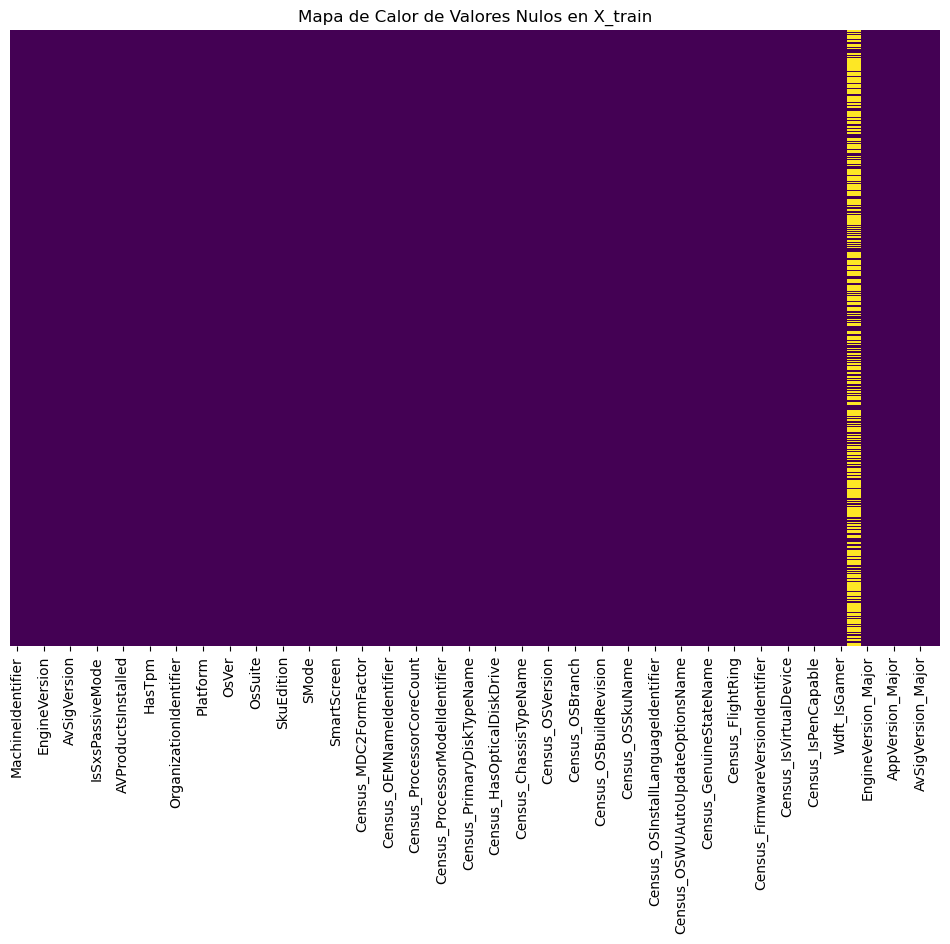

In [1458]:
plt.figure(figsize=(12, 8))
sns.heatmap(nulos, cbar=False, cmap='viridis', yticklabels=False)

plt.title('Mapa de Calor de Valores Nulos en X_train')
plt.show()

In [1459]:
def extract_major_minor_versions(X, columns):
    for column in columns:
        if column in X.columns:
            # Divide la versión en partes 'Mayor' y 'Menor', expandiendo el resultado a un DataFrame
            split_versions = X[column].astype(str).str.split('.', n=1, expand=True)
            X[f'{column}_Major'] = split_versions[0]
            # Comprueba si hay una segunda parte (columna 1) en el resultado del split
            if 1 in split_versions.columns:
                X[f'{column}_Minor'] = split_versions[1].where(split_versions[1].notnull(), None)
            else:
                # Asigna None si no hay una segunda parte después del split
                X[f'{column}_Minor'] = None
    return X

# Selección de las columnas de interés y división en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df6.drop(TARGET, axis=1), df6[TARGET], test_size=0.2, random_state=42
)

# Lista de columnas de versión para aplicar la extracción
version_columns = ['EngineVersion', 'AppVersion', 'AvSigVersion', 'Census_OsVersion']

# Aplicación de la función a los conjuntos de entrenamiento y prueba
X_train = extract_major_minor_versions(X_train, version_columns)
X_test = extract_major_minor_versions(X_test, version_columns)


In [1460]:
# Convierte todas las columnas categóricas a tipo str, incluidas las nuevas columnas de versiones
existing_categorical_columns = [col for col in categorical_features if col in X_train.columns]
existing_version_columns = [col for vc in version_columns for col in (f'{vc}_Major', f'{vc}_Minor') if col in X_train.columns]

# Combinamos las listas de columnas categóricas existentes y las columnas de versión existentes
all_existing_categorical_columns = existing_categorical_columns + existing_version_columns

# Convierte a tipo str solo las columnas existentes
X_train[all_existing_categorical_columns] = X_train[all_existing_categorical_columns].astype(str)
X_test[all_existing_categorical_columns] = X_test[all_existing_categorical_columns].astype(str)

# Continúa con la validación cruzada
scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean cross-validated accuracy: {scores.mean()}")
print(f"Standard deviation of accuracy scores: {scores.std()}")


NameError: name 'model_pipeline' is not defined

In [ ]:
# Predicción con el conjunto de prueba utilizando la pipeline
y_pred = model_pipeline.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')


NameError: name 'model_pipeline' is not defined